<h1><center>Dimentionality Reduction - Principal Component Analysis</center></h1>

  * <span style="color:red"> Warning : Reducing dimensionality does lose some information (just like compressing an image to JPEG can degrade its quality), so even though it will speed up training, it may also make your system perform slightly worse. It also makes your pipelines a bit more complex and thus harder to maintain. So you should first try to train your system with the original data before considering using dimensionality reduction if training is too slow. In some cases, however, reducing the dimensionality of the training data may filter out some noise and unnecessary details and thus result in higher performance (but in general it won’t; it will just speed up training). </span>
  * Apart from performance improvement, dimentionality reduction is useful in data visualization. Reduce multi-dimentional dataset into two dimentions and plot 2D graph to understand patterns in data (may not give right picture in most of the cases)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
digit_dataset = pd.read_csv('digit_recognizer_train.csv')

In [20]:
digit_dataset.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
digit_X = digit_dataset.iloc[:, 1:]
digit_y = digit_dataset['label']

In [22]:
# By default train_test_split does STRATIFIED split based on label (y-value).
from sklearn.model_selection import train_test_split
digit_X_train, digit_X_test, digit_y_train, digit_y_test = train_test_split(digit_X, digit_y, test_size=0.2)

In [23]:
some_digit = digit_X_train.loc[29814]
some_digit_image = some_digit.values.reshape(28, 28)

In [24]:
np.set_printoptions(linewidth=115)
print(some_digit_image)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   2  39 113 242  22   8   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  58 254 254 254 225 199 185 185 185 185 111  77   2   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  63 254 253 249 249 249 249 249 249 14

### scikit-learn PCA parameters:
  * **n_components:** This hyperparameter can be used to specify **number of components (an Integer)** we want to reduce to OR a float **between 0.0 and 1.0, indicating the ratio of variance you wish to preserve**. "n_components" variable on PCA class give access to Principle Components.
  <br>
  <br>
  * **Explained Varience Ratio:** Explained variance ratio of each principal component, available via the  **"explained_variance_ratio_"** attribute. It indicates the proportion of the dataset's variance that lies along the axis of each principal component.

In [25]:
from sklearn.decomposition import PCA
pca1 = PCA() 
pca1.fit_transform(digit_X_train).shape

(33600, 784)

* Here we have 784 Principal Components, one for each feature. 
* Note that **components_** attribute contains **principal components as horizontal vectors**, so, to access principal component we have to transpose pca.components_

In [26]:
pca1.components_[:, :].T.shape ## 784 projection OR 784 principal components

(784, 784)

In [27]:
pca1.explained_variance_ratio_.shape ## One explained varience ratio for each feature hence 784

(784,)

In [28]:
pca1.explained_variance_ratio_[:20] ## See how the PC's explained varience is reducing.

array([0.09733527, 0.07136311, 0.06136659, 0.05382191, 0.04899597, 0.04289449, 0.03281195, 0.02902706, 0.02763207,
       0.02349736, 0.02093499, 0.02038537, 0.01705277, 0.01700235, 0.01589408, 0.01487209, 0.01321232, 0.01290789,
       0.01191833, 0.01145691])

In [29]:
pca1.explained_variance_ratio_[:300].sum()

0.9863398843733187

#### To reduce number of columns to 20, n_components=20, the model selects top 20 components with high explained variance ratio

In [30]:
pca2 = PCA(n_components=20)  ## number of components (an Integer)
pca2.fit_transform(digit_X_train).shape

(33600, 20)

In [31]:
pca2.n_components_

20

#### If n_components=0.95 (a number between 0 and 1), then model will cumulatively sum explained variance ratio (eigen values) until it reaches n_components. Model will take coresponding "components of explained variance ratios" that contributed to n_components percentage.

In [32]:
pca3 = PCA(n_components=0.95)  ## ratio of variance you wish to preserve
pca3.fit_transform(digit_X_train).shape

(33600, 154)

In [33]:
pca3.n_components_

154

### How to choose Right Number of Dimensions or Principal Components ?
  * Approach 1:  Take cumulative sum of explained variance of the principal components, pick a threashold for preserving the origianl dataset variance.

In [34]:
pca1.explained_variance_ratio_

array([9.73352720e-02, 7.13631066e-02, 6.13665948e-02, 5.38219108e-02, 4.89959684e-02, 4.28944856e-02,
       3.28119459e-02, 2.90270593e-02, 2.76320723e-02, 2.34973557e-02, 2.09349882e-02, 2.03853654e-02,
       1.70527660e-02, 1.70023500e-02, 1.58940790e-02, 1.48720885e-02, 1.32123166e-02, 1.29078938e-02,
       1.19183298e-02, 1.14569135e-02, 1.06825403e-02, 1.01294921e-02, 9.66062958e-03, 9.12784893e-03,
       8.89093848e-03, 8.36239152e-03, 8.16249375e-03, 7.75838482e-03, 7.37129751e-03, 6.88466980e-03,
       6.57874490e-03, 6.42224585e-03, 5.98360192e-03, 5.91104462e-03, 5.65188998e-03, 5.40661961e-03,
       5.10927831e-03, 4.88497657e-03, 4.74762468e-03, 4.69510370e-03, 4.53332049e-03, 4.46109114e-03,
       4.21591071e-03, 3.96970875e-03, 3.85576299e-03, 3.76565425e-03, 3.61760871e-03, 3.47378371e-03,
       3.38591296e-03, 3.22652776e-03, 3.14520982e-03, 3.09656408e-03, 2.94503624e-03, 2.86967576e-03,
       2.81239200e-03, 2.70288320e-03, 2.65169293e-03, 2.56981447e-03, 2.

In [18]:
arr_cumsum = np.cumsum(pca1.explained_variance_ratio_)
arr_cumsum

array([0.09790498, 0.16961305, 0.23129417, 0.28509142, 0.33408105, 0.37686498, 0.40969494, 0.43884009, 0.46623828,
       0.48957922, 0.51049776, 0.5311464 , 0.54814808, 0.56514447, 0.58097221, 0.59580131, 0.60893549, 0.6218129 ,
       0.63364525, 0.64512549, 0.65583805, 0.66589694, 0.67561814, 0.68478623, 0.69361131, 0.70201502, 0.71016315,
       0.71796791, 0.72537501, 0.7322294 , 0.73881345, 0.74523339, 0.75123253, 0.75711308, 0.76274807, 0.76816062,
       0.77322276, 0.77807654, 0.78281684, 0.78748131, 0.79202696, 0.79644709, 0.80061704, 0.8045789 , 0.80841863,
       0.81215359, 0.81577905, 0.81925403, 0.82262074, 0.8258334 , 0.82899834, 0.83208564, 0.83504187, 0.83789791,
       0.8407014 , 0.84338577, 0.84603914, 0.84859784, 0.85112728, 0.8535867 , 0.85598491, 0.85837132, 0.86065697,
       0.86287312, 0.86502185, 0.8670881 , 0.86911431, 0.87106297, 0.87300516, 0.87488037, 0.87675211, 0.87856132,
       0.88032419, 0.88203078, 0.88368566, 0.88531438, 0.88692463, 0.88846056, 0

In [19]:
np.argmax(arr_cumsum)

696

In [20]:
arr_cumsum[699:]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1.])

In [21]:
num_components = np.argmax(arr_cumsum >= 0.99) + 1
print("Number of components for 99% preserverd vairance : ", num_components)

Number of components for 99% preserverd vairance :  330


#### Now use this "num_components"  as a paramenter in PCA(n_components=num_components), get data with dimentionality reduced from 784 to 330.

In [22]:
pca_99 = PCA(n_components=num_components)
digit_X_train_99 = pca_99.fit_transform(digit_X_train)
digit_X_train_99.shape

(33600, 330)

  * Approach 2:  Plot the explained variance (cumulative) as a function of the number of dimensions. There will usually be an elbow in the curve, where the explained variance stops growing fast. We can take the number of dimentions at this elbow as the best explained variance.

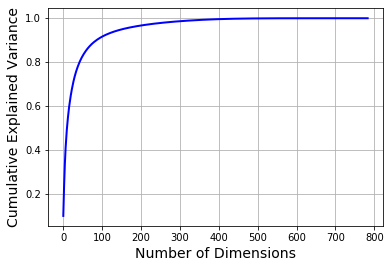

In [23]:
x_lbls = np.arange(len(arr_cumsum))
plt.plot(x_lbls, arr_cumsum, "b-", linewidth=2)
plt.xlabel("Number of PCs", fontsize=14) 
plt.ylabel("Cumulative Explained Variance", fontsize=14)   
plt.grid(True)

In [24]:
pca_dim_400 = PCA(n_components=400)
digit_X_train_dim_400 = pca_dim_400.fit_transform(digit_X_train)
digit_X_train_dim_400.shape

(33600, 400)

In [25]:
pca_dim_400.components_[:, :].T.shape

(784, 400)

### decompress (Inverse Transform) the reduced dataset back to 784 dimensions: 
  * We can decompress the reduced dataset back to 784 dimensions by applying the inverse transformation of the PCA projection. **This reconstructed data won't give back the original data,** since the projection lost a bit of information (within the 5% variance that was dropped), but it will likely be quite close to the original data. The mean squared distance between the original data and the reconstructed data (compressed and then decompressed) is called the **"Reconstruction Error"**.

In [26]:
digit_X_train_reconstructed = pca_dim_400.inverse_transform(digit_X_train_dim_400)
digit_X_train_reconstructed.shape

(33600, 784)

In [27]:
digit_X_train.index

Int64Index([21063, 11633, 22280,  6174, 22531, 26810, 40841,  8629, 23049,
            25651,
            ...
               59, 32227,  9635, 33027, 22844, 36410, 32810, 39245, 29475,
            38375],
           dtype='int64', length=33600)

(-0.5, 27.5, 27.5, -0.5)

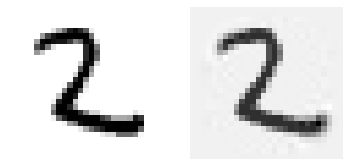

In [28]:
from  matplotlib.cm import  binary

some_digit = digit_X_train.iloc[13361]
some_digit_image = some_digit.values.reshape(28, 28)

some_digit_recon = digit_X_train_reconstructed[13361]
some_digit_image_recon = some_digit_recon.reshape(28, 28)


#plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(some_digit_image, cmap = binary,
           interpolation="nearest")
plt.axis("off")

plt.subplot(122)
plt.imshow(some_digit_image_recon, cmap = binary,
           interpolation="nearest")
plt.axis("off")

### Is our Dimensionality Reduction Useful?
  * On Hand Written Digit Recognition dataset (with 784 pixels) we got an F1-Score of 92% on train set
  * Let's use Dimensionality reduced (400 feature) dataset and see if we are getting an F1-Score close t0 92% on train set

In [29]:
from sklearn.preprocessing import StandardScaler
stdScaler = StandardScaler()
digit_X_train_dim_400 = stdScaler.fit_transform(digit_X_train_dim_400)

In [30]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42, loss='log')
sgd_clf.fit(digit_X_train_dim_400, digit_y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=42, shuffle=True, tol=0.001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [31]:
y_train_pred = sgd_clf.predict(digit_X_train_dim_400)

In [32]:
from sklearn.metrics import f1_score
f1_score(digit_y_train, y_train_pred, average='weighted')

0.9270033823739077

#### YES, we got it, hence we can use PCA on this dataset.

## Incremental PCA
  * One problem with the preceding implementation of PCA is that it requires the whole training set to fit in memory in order for the SVD algorithm to run. **To overcome this memory issue we can use incremental PCA (IPCA) algorithms.** Incremental PCA can take data in mini-batches one mini-batch at a time. This is useful for large training sets, and also to apply PCA online (i.e., on the fly, as new instances arrive). **Please remember to call partial_fit() on IPCA** (insead of fit()).

In [33]:
from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components=200)
for batch in np.array_split(digit_X_train, n_batches):
    inc_pca.partial_fit(batch)

digit_X_train_inc = inc_pca.transform(digit_X_train)    
digit_X_train_inc.shape

(33600, 200)